In [1]:
import pandas as pd

In [12]:
df = pd.read_csv("eurofxref-hist.csv")

In [14]:
#check time-span
print(df['Date'].min(), df['Date'].max())

1999-01-04 2025-11-25


In [16]:
#check columns and what's in the dataset
df.columns

Index(['Date', 'USD', 'JPY', 'BGN', 'CYP', 'CZK', 'DKK', 'EEK', 'GBP', 'HUF',
       'LTL', 'LVL', 'MTL', 'PLN', 'ROL', 'RON', 'SEK', 'SIT', 'SKK', 'CHF',
       'ISK', 'NOK', 'HRK', 'RUB', 'TRL', 'TRY', 'AUD', 'BRL', 'CAD', 'CNY',
       'HKD', 'IDR', 'ILS', 'INR', 'KRW', 'MXN', 'MYR', 'NZD', 'PHP', 'SGD',
       'THB', 'ZAR', 'Unnamed: 42'],
      dtype='object')

In [20]:
#check if there are nan values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6889 entries, 0 to 6888
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    6889 non-null   object 
 1   USD     6889 non-null   float64
 2   JPY     6889 non-null   float64
 3   BGN     6491 non-null   float64
 4   CYP     2304 non-null   float64
 5   CZK     6889 non-null   float64
 6   DKK     6889 non-null   float64
 7   EEK     3074 non-null   float64
 8   GBP     6889 non-null   float64
 9   HUF     6889 non-null   float64
 10  LTL     4097 non-null   float64
 11  LVL     3842 non-null   float64
 12  MTL     2304 non-null   float64
 13  PLN     6889 non-null   float64
 14  ROL     1664 non-null   float64
 15  RON     5225 non-null   float64
 16  SEK     6889 non-null   float64
 17  SIT     2049 non-null   float64
 18  SKK     2560 non-null   float64
 19  CHF     6889 non-null   float64
 20  ISK     4548 non-null   float64
 21  NOK     6889 non-null   float64
 22  

### Data Cleaning

In [ ]:
#remove unnecessary column
df = df.drop(columns = ['Unnamed: 42'])


In [22]:
#sort the rows with time ascending
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,Date,USD,JPY,BGN,CYP,CZK,DKK,EEK,GBP,HUF,...,ILS,INR,KRW,MXN,MYR,NZD,PHP,SGD,THB,ZAR
0,1999-01-04,1.1789,133.73,NaN,0.58231,35.107,7.4501,15.6466,0.71110,251.48,...,NaN,NaN,1398.59,NaN,NaN,2.2229,NaN,1.9554,NaN,6.9358
1,1999-01-05,1.1790,130.96,NaN,0.58230,34.917,7.4495,15.6466,0.71220,250.80,...,NaN,NaN,1373.01,NaN,NaN,2.2011,NaN,1.9655,NaN,6.7975
2,1999-01-06,1.1743,131.42,NaN,0.58200,34.850,7.4452,15.6466,0.70760,250.67,...,NaN,NaN,1359.54,NaN,NaN,2.1890,NaN,1.9699,NaN,6.7307
3,1999-01-07,1.1632,129.43,NaN,0.58187,34.886,7.4431,15.6466,0.70585,250.09,...,NaN,NaN,1337.16,NaN,NaN,2.1531,NaN,1.9436,NaN,6.8283
4,1999-01-08,1.1659,130.09,NaN,0.58187,34.938,7.4433,15.6466,0.70940,250.15,...,NaN,NaN,1366.73,NaN,NaN,2.1557,NaN,1.9537,NaN,6.7855


In [23]:
#choose USD - Euro as topic
euro_usd = df[['Date', 'USD']]

### Initial Visualisation

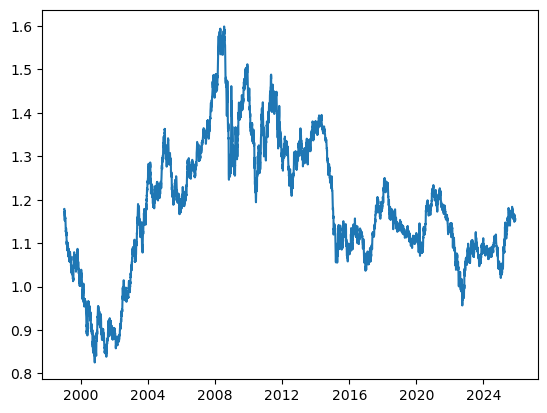

In [24]:
#see time trend of euro - usd
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(euro_usd['Date'], euro_usd['USD'])
plt.show()


### Visualizing: Rolling Mean 

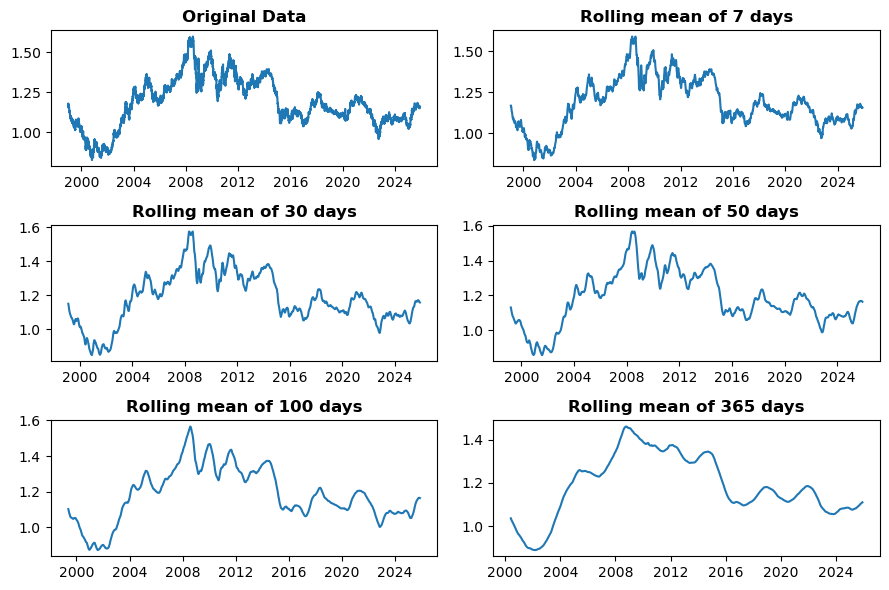

In [33]:
#basic settings
plt.figure(figsize=(9,6))
plt.subplot(3,2,1)
plt.plot(euro_usd['Date'],euro_usd['USD'])
plt.title('Original Data', weight='bold')

#plot the subplots in different rolling means
for i, rolling_mean in zip([2, 3, 4, 5, 6], [7, 30, 50, 100, 365]):
    plt.subplot(3,2,i)
    plt.plot(euro_usd['Date'], euro_usd['USD'].rolling(window=rolling_mean).mean())
    plt.title(f"Rolling mean of {rolling_mean} days", weight='bold')
plt.tight_layout()
plt.show()

### Add data back to euro - usd dataframe

In [37]:
euro_usd['rolling_mean_30'] = euro_usd['USD'].rolling(window=30).mean()
euro_usd 

,Date,USD,rolling_mean_30
0,1999-01-04,1.1789,NaN
1,1999-01-05,1.1790,NaN
2,1999-01-06,1.1743,NaN
3,1999-01-07,1.1632,NaN
4,1999-01-08,1.1659,NaN
...,...,...,...
6884,2025-11-19,1.1583,1.158877
6885,2025-11-20,1.1514,1.158553
6886,2025-11-21,1.1520,1.158393
6887,2025-11-24,1.1544,1.158310


### Story idea

Here are a few story ideas for the data:
* We show how the euro-dollar rate has changed post-covid and into GenAI era. We can show the 2022-2025 data and the 2016-2019 data as a baseline. We can use a line plot.

### Storytelling with Data Exploration

#### GenAI Era Example

In [38]:
gen = euro_usd.copy()[(euro_usd['Date'] >= '2022-01-01') & (euro_usd['Date'] <= '2025-12-31')]
pre = euro_usd.copy()[(euro_usd['Date'] >= '2016-01-01') & (euro_usd['Date'] <= '2019-12-31')]

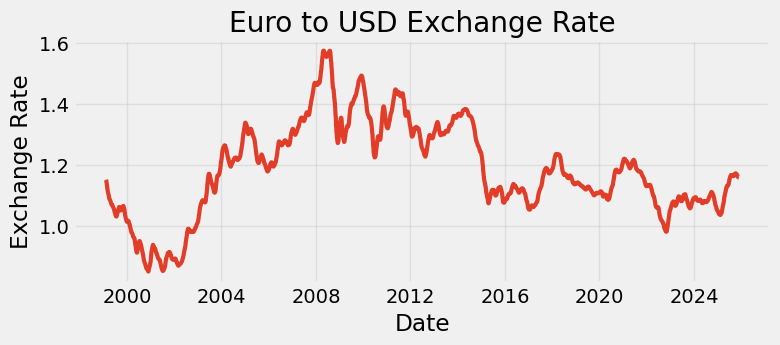

In [42]:
#using the FiveThirtyEight style
import matplotlib.style as style
style.use('fivethirtyeight')

#adding the plot
fig, ax = plt.subplots(figsize = (8,3))
ax.plot(euro_usd['Date'], euro_usd['rolling_mean_30'], linewidth = 1, color = '#A6D785')

#highlight 2022-2025 period
ax.plot(euro_usd['Date'], euro_usd['rolling_mean_30'], linewidth = 3, color = '#e23d28')

#adding the title and labels
ax.set_title('Euro to USD Exchange Rate')
ax.set_xlabel('Date')
ax.set_ylabel('Exchange Rate')
ax.grid(alpha=0.5)
plt.show()